In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Here we have the data for IPL batsman for 2023.

In [ ]:
batsmen = pd.read_csv('IPL2023_Batsman.csv',  encoding='windows-1252')
batsmen.head(10)

,match_no,Batsman,team,Run,Ball,4s,6s,out_by
0,1,Devon Conway,Chennai Super Kings,1,6,0,0,Mohammed Shami
1,1,Ruturaj Gaikwad,Chennai Super Kings,92,50,4,9,Alzarri Joseph
2,1,Moeen Ali,Chennai Super Kings,23,17,4,1,Rashid Khan
3,1,Ben Stokes,Chennai Super Kings,7,6,1,0,Rashid Khan
4,1,Ambati Rayudu,Chennai Super Kings,12,12,0,1,Joshua Little
5,1,Shivam Dube,Chennai Super Kings,19,18,0,1,Mohammed Shami
6,1,Ravindra Jadeja,Chennai Super Kings,1,2,0,0,Alzarri Joseph
7,1,MS Dhoni,Chennai Super Kings,14,7,1,1,Not Out
8,1,Mitchell Santner,Chennai Super Kings,1,3,0,0,Not Out
9,1,Wriddhiman Saha,Gujarat Titans,25,16,2,2,Rajvardhan Hangargekar


In [ ]:
batsmen.dtypes

match_no     int64
Batsman     object
team        object
Run          int64
Ball         int64
4s           int64
6s           int64
out_by      object
dtype: object

In [ ]:

df = batsmen

# Group the data by 'Batsman'
grouped = df.groupby('Batsman')

# Calculate the required statistics
result = grouped.agg({
    'Run': 'sum',            # Total runs
    'Ball': 'sum',           # Total balls
    'match_no': 'nunique',   # Matches played (count unique match numbers)
    '4s': 'sum',             # Total 4s
    '6s': 'sum'              # Total 6s
}).reset_index()             # Reset the index to get 'Batsman' as a regular column

# Add a new column 'Not_Out' counting instances of 'Not Out' in 'out_by'
df['Not_Out'] = df['out_by'].apply(lambda x: 1 if x == 'Not Out' else 0)

# Group and sum the 'Not_Out' column for each player
not_out_counts = df.groupby('Batsman')['Not_Out'].sum().reset_index()

# Merge the not_out_counts with the result DataFrame
result = result.merge(not_out_counts, on='Batsman', how='left')
result['Strike_Rate'] = (result['Run'] / result['Ball']) * 100

# Calculate the 'Average' while avoiding division by zero
result['Average'] = result.apply(lambda row: row['Run'] / (row['match_no'] - row['Not_Out']) if (row['match_no'] - row['Not_Out']) != 0 else 0, axis=1)

# Rename columns for clarity
result.rename(columns={'match_no': 'Matches_Played', 'Not_Out': 'Not_Out_Count'}, inplace=True)

# Print the resulting DataFrame
result.head(10)


,Batsman,Run,Ball,Matches_Played,4s,6s,Not_Out_Count,Strike_Rate,Average
0,Abdul Basith,1,1,1,0,0,1,100.000000,0.000000
1,Abdul Samad,169,128,8,10,11,4,132.031250,42.250000
2,Abhinav Manohar,114,83,6,6,7,0,137.349398,19.000000
3,Abhishek Sharma,225,157,11,28,6,0,143.312102,20.454545
4,Abishek Porel,33,31,4,1,0,0,106.451613,8.250000
5,Adam Zampa,10,16,3,0,0,0,62.500000,3.333333
6,Adil Rashid,22,16,2,2,1,0,137.500000,11.000000
7,Aiden Markram,248,197,13,18,8,2,125.888325,22.545455
8,Ajinkya Rahane,282,166,9,22,13,1,169.879518,35.250000
9,Akash Deep,17,8,1,2,1,0,212.500000,17.000000


Here we've computed two essential objective functions: Strike Rate and Average. These metrics serve as crucial performance indicators for a batsman.

we are calculating two metrics to assess the model's performance:

Sum of Squares of Error (SSE) within clusters using the elbow method.
Silhouette Score.

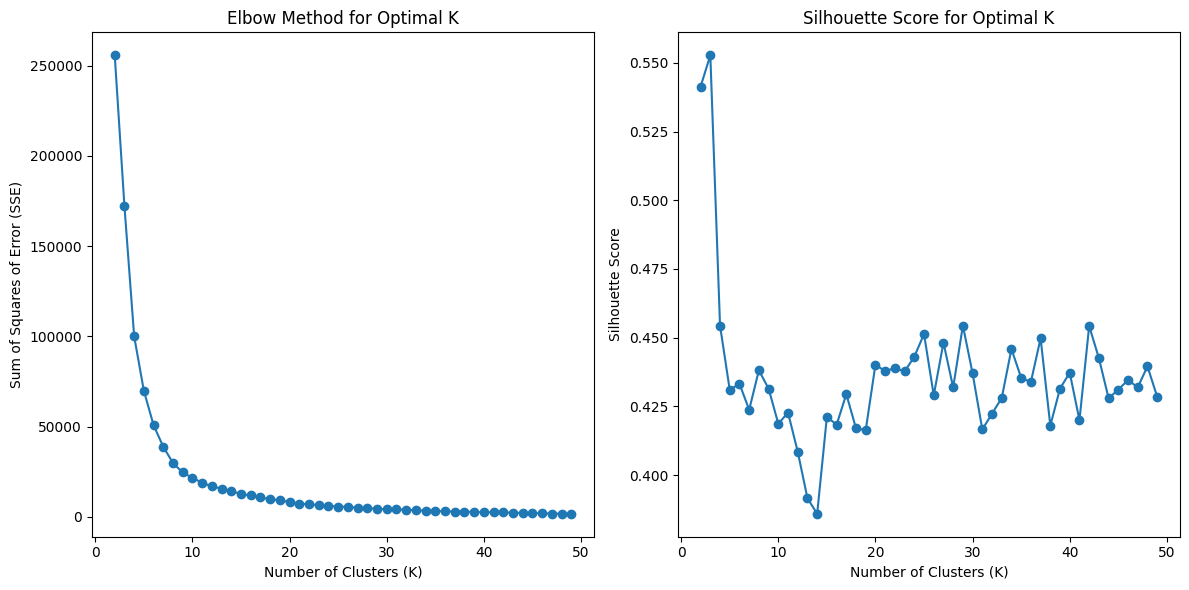

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



# Extract the "Average" and "Strike_Rate" columns
X = result[["Average", "Strike_Rate"]]

# Initialize lists to store SSE and Silhouette scores
sse = []
silhouette_scores = []

# Try different values of K (number of clusters) to find the optimal K
K_range = range(2, 50)  # You can adjust this range as needed

for k in K_range:
    # Fit a KMeans model
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(X)

    # Calculate SSE for this K
    sse.append(kmeans.inertia_)

    # Calculate Silhouette Score for this K
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Plot SSE
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(K_range, sse, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squares of Error (SSE)')
plt.title('Elbow Method for Optimal K')

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')

plt.tight_layout()
plt.show()


The Silhouette score for our clusters appears to be 12, as there is a significant drop from 12 to 13. Additionally, in the Elbow method, the value seems to level off after k = 12, indicating a plateau.

In this section, we are applying k-means clustering technique with a value of 12 for the number of clusters.

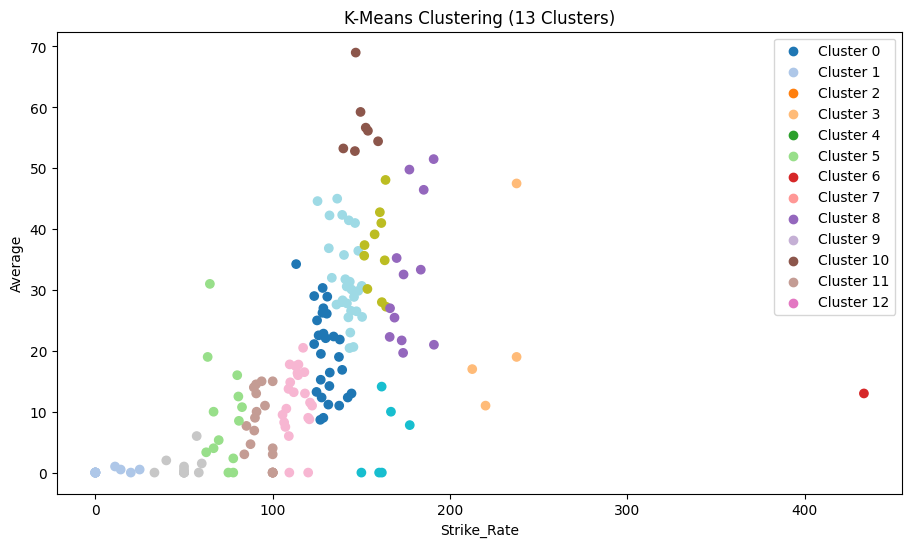

In [ ]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture


# Extract the "Average" and "Strike_Rate" columns
X = result[["Average", "Strike_Rate"]]

# Number of clusters
n_clusters = 13

# Fit K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)
kmeans_labels = kmeans.fit_predict(X)

# Add K-Means cluster labels to DataFrame
result["KMeans_12_Cluster"] = kmeans_labels

# Define a colormap for clusters
cmap = plt.get_cmap('tab20')

# Create a scatter plot for K-Means
plt.figure(figsize=(24, 6))
plt.subplot(1, 2, 1)
plt.scatter(X["Strike_Rate"], X["Average"], c=kmeans_labels, cmap=cmap)
plt.xlabel('Strike_Rate')
plt.ylabel('Average')
plt.title('K-Means Clustering ({} Clusters)'.format(n_clusters))

# Add color labels for K-Means clusters
for i in range(n_clusters):
    plt.scatter([], [], label='Cluster {}'.format(i), color=cmap(i))

plt.legend()


plt.show()

In this part, we are computing the average values of "Average" and "Strike Rate" for each of the clusters.

In [ ]:
kmeans_cluster_avg = result.groupby('KMeans_12_Cluster').agg({
    'Average': 'mean',      # Average of 'Average' within each cluster
    'Strike_Rate': 'mean',  # Average of 'Strike_Rate' within each cluster
    'Batsman': 'count'
}).reset_index()

# Rename the columns for clarity
kmeans_cluster_avg.rename(columns={'Average': 'Average_Avg', 'Strike_Rate': 'Strike_Rate_Avg', 'Batsman': 'Player_Count'}, inplace=True)

# Print the average values for each cluster
print(kmeans_cluster_avg)

    KMeans_12_Cluster  Average_Avg  Strike_Rate_Avg  Player_Count
0                   0    19.701437       130.209578            28
1                   1     0.142857         5.028345            14
2                   2    23.625000       226.875000             4
3                   3     9.442308        72.935433            13
4                   4    13.000000       433.333333             1
5                   5    32.165194       176.505392            12
6                   6    57.366752       149.724669             7
7                   7     6.880702        94.067959            19
8                   8    11.779293       113.561546            22
9                   9     0.916667        49.900794            12
10                 10    36.428922       158.810481            10
11                 11     5.320833       162.817738             6
12                 12    31.812834       141.560969            28


In this step, we are filtering clusters that have an average "Average" value above 20 and an average "Strike Rate" value above 100. These criteria are generally associated with identifying good batters in the T-20 cricket format.

In [ ]:
filtered_clusters = kmeans_cluster_avg[
    (kmeans_cluster_avg['Average_Avg'] > 20) &
    (kmeans_cluster_avg['Strike_Rate_Avg'] > 100)
]

# Print the filtered clusters
print(filtered_clusters)

    KMeans_12_Cluster  Average_Avg  Strike_Rate_Avg  Player_Count
2                   2    23.625000       226.875000             4
5                   5    32.165194       176.505392            12
6                   6    57.366752       149.724669             7
10                 10    36.428922       158.810481            10
12                 12    31.812834       141.560969            28


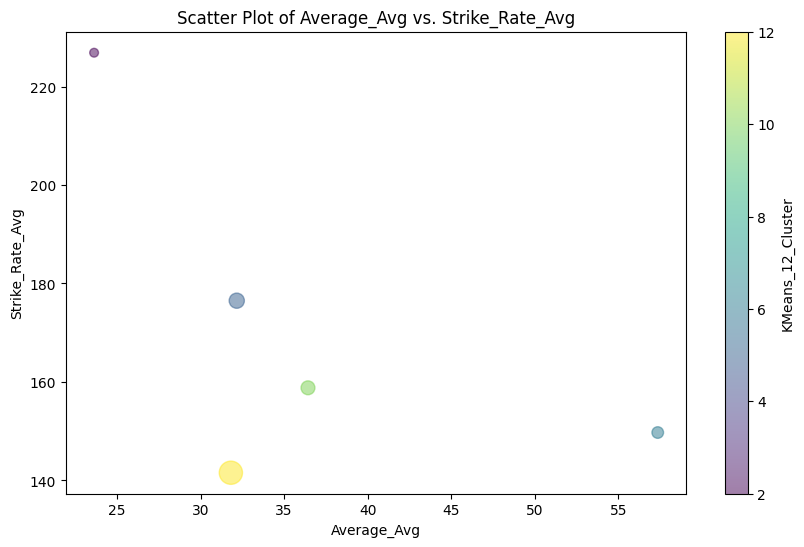

In [ ]:
data = filtered_clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['Average_Avg'], data['Strike_Rate_Avg'], c=data['KMeans_12_Cluster'], cmap='viridis', s=data['Player_Count']*10, alpha=0.5)
plt.colorbar(label='KMeans_12_Cluster')
plt.title('Scatter Plot of Average_Avg vs. Strike_Rate_Avg')
plt.xlabel('Average_Avg')
plt.ylabel('Strike_Rate_Avg')
plt.show()

After applying the filtering criteria, we have narrowed down the clusters to 2, 5, 6, 10, and 12.

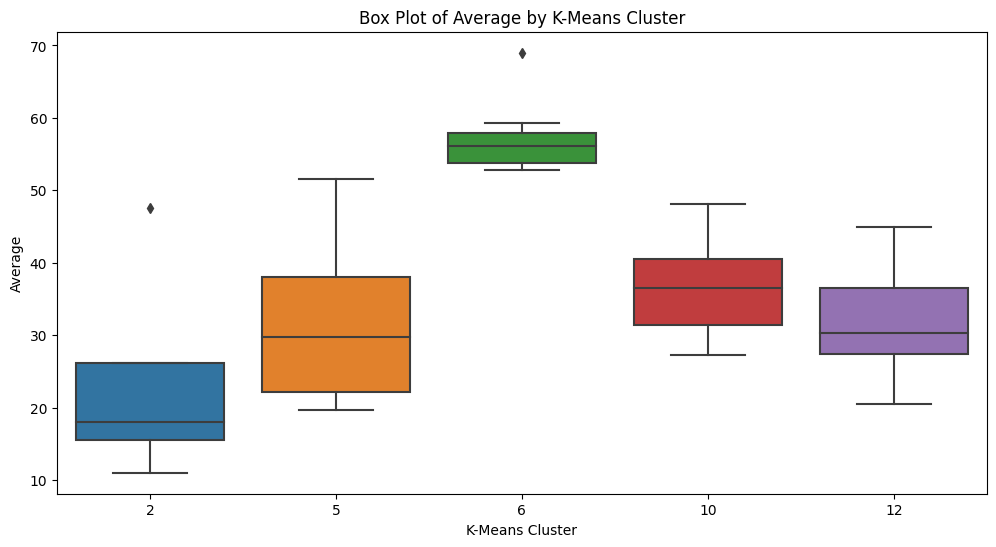

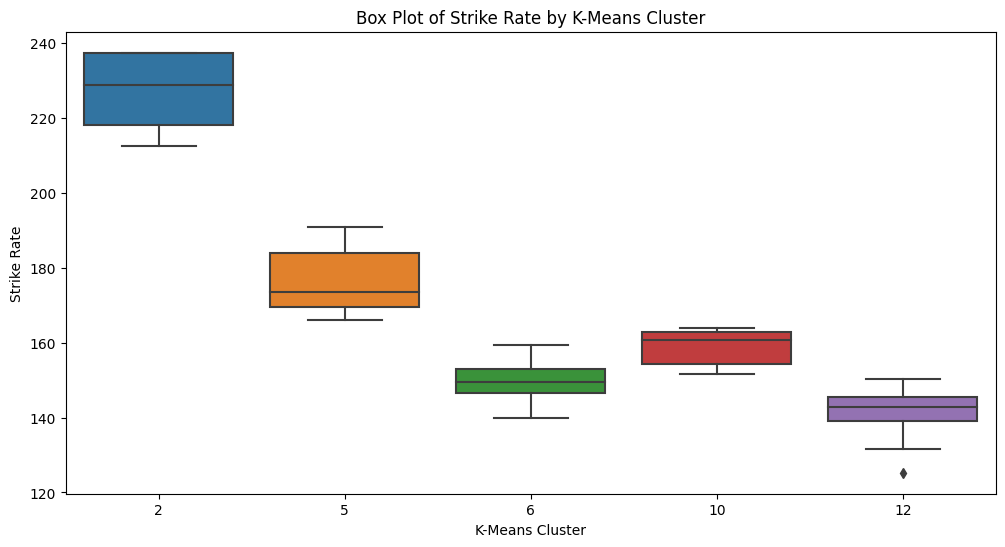

In [ ]:
clusters_to_keep = [2, 5, 6, 10, 12]

# Filter the data based on the 'KMeans_12_Cluster' column
filtered_cluster_data = result[result['KMeans_12_Cluster'].isin(clusters_to_keep)]

# Print the filtered data
plt.figure(figsize=(12, 6))
sns.boxplot(x='KMeans_12_Cluster', y='Average', data=filtered_cluster_data)
plt.title('Box Plot of Average by K-Means Cluster')
plt.xlabel('K-Means Cluster')
plt.ylabel('Average')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='KMeans_12_Cluster', y='Strike_Rate', data=filtered_cluster_data)
plt.title('Box Plot of Strike Rate by K-Means Cluster')
plt.xlabel('K-Means Cluster')
plt.ylabel('Strike Rate')
plt.show()

Among the filtered clusters, clusters 5, 6, and 10 appear to perform well in terms of both high average and high strike rate.

we are further refining our data by considering only players who have participated in at least 10 matches. This ensures that we are focusing on players with a sufficient sample size of matches for more reliable analysis.

In [ ]:
smaller_filterd_data = filtered_cluster_data[filtered_cluster_data['Matches_Played'] >= 10]

In this section, we are once again conducting the Elbow and Silhouette methods to determine the optimal number of clusters.

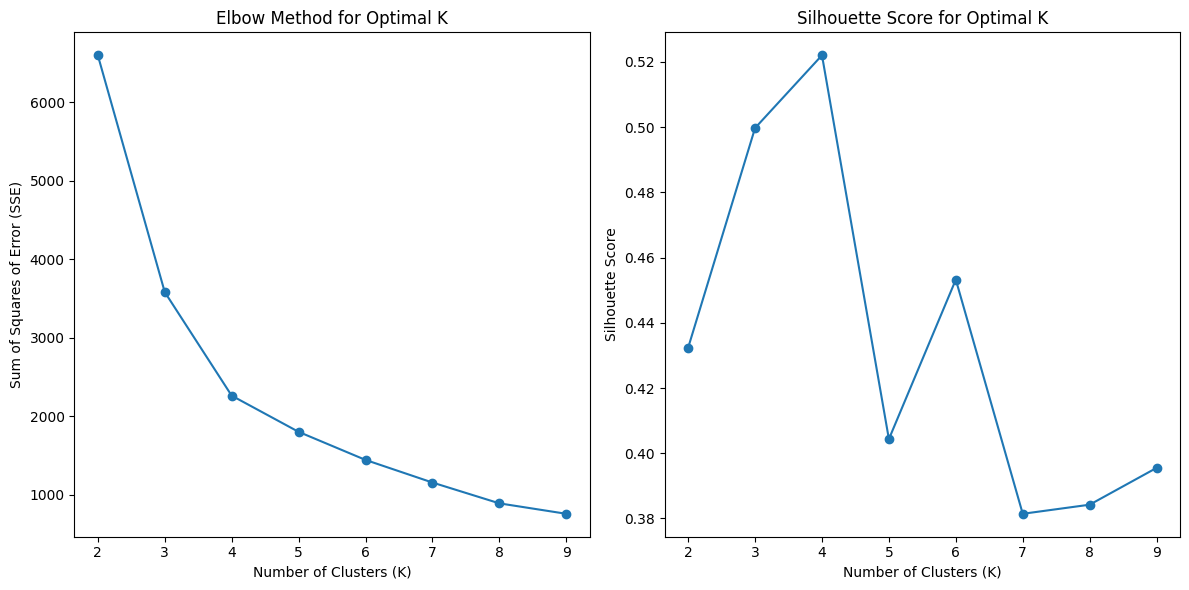

In [ ]:
X = smaller_filterd_data[["Average", "Strike_Rate"]]

# Initialize lists to store SSE and Silhouette scores
sse = []
silhouette_scores = []

# Try different values of K (number of clusters) to find the optimal K
K_range = range(2,10)  # You can adjust this range as needed

for k in K_range:
    # Fit a KMeans model
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(X)

    # Calculate SSE for this K
    sse.append(kmeans.inertia_)

    # Calculate Silhouette Score for this K
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Plot SSE
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(K_range, sse, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squares of Error (SSE)')
plt.title('Elbow Method for Optimal K')

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')

plt.tight_layout()
plt.show()

From the graphs, it is evident that there is a noticeable dip at the transition from 4 to 5 clusters, which is also reflected in the elbow score. This suggests that 5 clusters might be the optimal choice for our analysis.

<ipython-input-72-351efe52660c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smaller_filterd_data.loc[:, "KMeans_4_Cluster"] = kmeans_labels


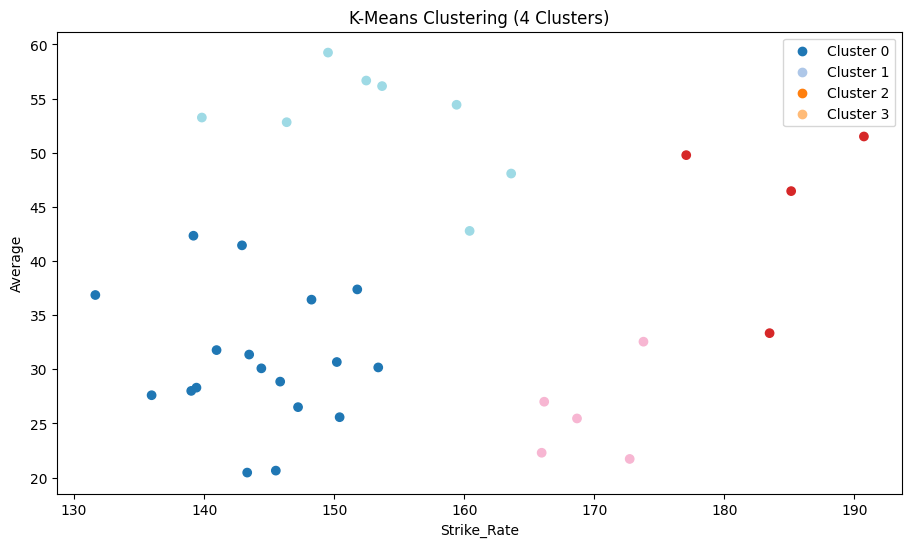

In [ ]:
X = smaller_filterd_data[["Average", "Strike_Rate"]]

# Number of clusters
n_clusters = 4

# Fit K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)
kmeans_labels = kmeans.fit_predict(X)

# Add K-Means cluster labels to DataFrame
smaller_filterd_data.loc[:, "KMeans_4_Cluster"] = kmeans_labels

# Define a colormap for clusters
cmap = plt.get_cmap('tab20')

# Create a scatter plot for K-Means
plt.figure(figsize=(24, 6))
plt.subplot(1, 2, 1)
plt.scatter(X["Strike_Rate"], X["Average"], c=kmeans_labels, cmap=cmap)
plt.xlabel('Strike_Rate')
plt.ylabel('Average')
plt.title('K-Means Clustering ({} Clusters)'.format(n_clusters))

# Add color labels for K-Means clusters
for i in range(n_clusters):
    plt.scatter([], [], label='Cluster {}'.format(i), color=cmap(i))

plt.legend()



In this part, we are computing the average values of "Average" and "Strike Rate" for each of the clusters.


In [ ]:
kmeans_cluster_avg = smaller_filterd_data.groupby('KMeans_4_Cluster').agg({
    'Average': 'mean',      # Average of 'Average' within each cluster
    'Strike_Rate': 'mean',  # Average of 'Strike_Rate' within each cluster
    'Batsman': 'count'
}).reset_index()

# Rename the columns for clarity
kmeans_cluster_avg.rename(columns={'Average': 'Average_Avg', 'Strike_Rate': 'Strike_Rate_Avg', 'Batsman': 'Player_Count'}, inplace=True)

# Print the average values for each cluster
print(kmeans_cluster_avg)

   KMeans_4_Cluster  Average_Avg  Strike_Rate_Avg  Player_Count
0                 0    30.800056       144.047828            18
1                 1    45.266414       184.111751             4
2                 2    25.800000       169.459934             5
3                 3    52.927746       153.161675             8


Following the clustering analysis, clusters 1 and 3 emerge as clear choices for our focus, as they exhibit both high strike rates, high averages, and a substantial number of matches played.

In [ ]:
smaller_filterd_data[smaller_filterd_data['KMeans_4_Cluster'].isin([1,3])]

,Batsman,Run,Ball,Matches_Played,4s,6s,Not_Out_Count,Strike_Rate,Average,KMeans_13_Cluster,GMM_13_Cluster,KMeans_12_Cluster,GMM_12_Cluster,KMeans_4_Cluster
30,Cameron Green,381,239,14,32,19,7,159.414226,54.428571,6,10,6,10,3
43,Faf du Plessis,730,475,14,60,36,1,153.684211,56.153846,6,6,6,6,3
45,Glenn Maxwell,400,218,14,29,31,2,183.486239,33.333333,5,5,5,5,1
54,Heinrich Klaasen,448,253,11,32,25,2,177.075099,49.777778,5,5,5,5,1
81,MS Dhoni,103,54,10,3,10,8,190.740741,51.500000,5,5,5,5,1
128,Rinku Singh,474,317,14,31,29,6,149.526814,59.250000,6,6,6,6,3
135,Ruturaj Gaikwad,581,397,13,48,29,2,146.347607,52.818182,6,6,6,6,3
147,Shivam Dube,385,240,12,12,33,3,160.416667,42.777778,10,10,10,10,3
148,Shubman Gill,680,446,14,67,22,2,152.466368,56.666667,6,6,6,6,3
151,Suryakumar Yadav,511,276,14,56,24,3,185.144928,46.454545,5,5,5,5,1


It's promising to observe that our clustering method aligns with the top choices for batsmen in the tournament. This suggests that the clustering approach effectively identifies and highlights strong performers in the context of the competition.